In [1]:
import pandas as pd
import numpy as np
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

In [2]:

shift_df = pd.read_json("testing_data_for_dev.json")
sales_df = pd.read_json("testing_sales_pre.json")
staff_df = pd.read_json("testing_staff.json")
date = {
    "start_date" : "2025-12-20",
    "end_date" : "2025-12-27"
}


In [3]:
shift_df.head()
shift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        100 non-null    datetime64[ns]
 1   shift_id    100 non-null    int64         
 2   staff_id    100 non-null    int64         
 3   start_time  100 non-null    datetime64[ns]
 4   end_time    100 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 4.0 KB


In [4]:


sales_df["date"] = pd.to_datetime(sales_df["date"])
sales_df.head()

,date,predicted_sales
0,2025-12-19 00:00:00+00:00,189455.484375
1,2025-12-20 00:00:00+00:00,239434.625000
2,2025-12-21 00:00:00+00:00,254088.718750
3,2025-12-22 00:00:00+00:00,200141.875000
4,2025-12-23 00:00:00+00:00,188711.984375


In [5]:
staff_df.head()

,age,e_mail,gender,id,level,name,status
0,23,test1@gmail.com,Male,1,3,testing1(inter student),international
1,35,testing2@gmail.com,Female,2,3,testing2(full),full-time
2,19,tesing3@gmail.com,Female,3,2,testing3(highschool),high-school
3,25,tesing4@gmail.com,Female,4,3,testing4(part),part-time
4,40,testing@gmail.com,Male,5,5,testing5(manager),full-time


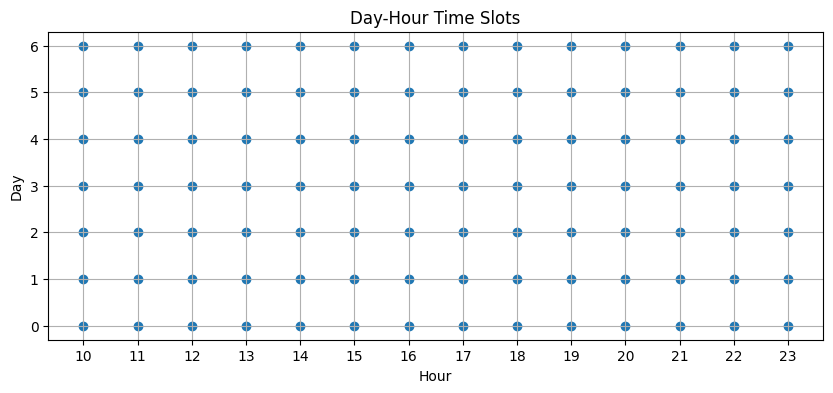

In [6]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.arange(10,24)
days = np.arange(7)

day_grid, hour_grid = np.meshgrid(days, hours, indexing="ij")

fig, ax = plt.subplots(figsize=(10,4))

ax.scatter(
    hour_grid.flatten(),
    day_grid.flatten()
)

ax.set_xticks(hours)
ax.set_yticks(days)
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Day-Hour Time Slots")

ax.grid(True)

plt.show()


In [7]:
sales_df.head()
sales_df["cost"] = sales_df["predicted_sales"] * 0.28



In [8]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum

model = LpProblem("Shift_Ass", LpMinimize)

In [9]:
staff_df = staff_df[["id","level","status"]]
shift_df = shift_df[shift_df["date"].between(date["start_date"], date["end_date"])]
sales_df = sales_df[sales_df["date"].between(date["start_date"], date["end_date"])]

In [10]:
shift_df = shift_df.merge(
    staff_df[["id", "level", "status"]],
    left_on="staff_id",
    right_on="id",
    how="left"
)


In [11]:
shift_df

,date,shift_id,staff_id,start_time,end_time,id,level,status
0,2025-12-20,6,6,2025-12-22 09:00:00,2025-12-22 18:00:00,6,2,international
1,2025-12-20,7,7,2025-12-22 18:00:00,2025-12-22 23:00:00,7,3,part-time
2,2025-12-20,8,8,2025-12-22 11:00:00,2025-12-22 20:00:00,8,4,full-time
3,2025-12-20,9,9,2025-12-22 16:00:00,2025-12-22 21:00:00,9,1,high-school
4,2025-12-20,10,10,2025-12-22 18:00:00,2025-12-22 23:00:00,10,3,part-time
5,2025-12-21,11,11,2025-12-22 09:00:00,2025-12-22 18:00:00,11,2,international
6,2025-12-21,12,12,2025-12-22 11:00:00,2025-12-22 20:00:00,12,4,full-time
7,2025-12-21,13,13,2025-12-22 18:00:00,2025-12-22 23:00:00,13,2,international
8,2025-12-21,14,14,2025-12-22 09:00:00,2025-12-22 18:00:00,14,3,part-time
9,2025-12-21,15,15,2025-12-22 18:00:00,2025-12-22 23:00:00,15,5,full-time


In [12]:
def salary(level):
    if level == 5:
        return 1500
    elif level == 4:
        return 1200
    elif level == 3:
        return 1170
    else :
        return 1150
shift_df["salary"] = shift_df["level"].apply(salary)

In [13]:
shift_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40 non-null     datetime64[ns]
 1   shift_id    40 non-null     int64         
 2   staff_id    40 non-null     int64         
 3   start_time  40 non-null     datetime64[ns]
 4   end_time    40 non-null     datetime64[ns]
 5   id          40 non-null     int64         
 6   level       40 non-null     int64         
 7   status      40 non-null     object        
 8   salary      40 non-null     int64         
dtypes: datetime64[ns](3), int64(5), object(1)
memory usage: 2.9+ KB


In [15]:
sales_df["date"] = sales_df["date"].dt.tz_localize(None)



In [16]:
shift_df = shift_df.merge(
    sales_df[["date", "predicted_sales"]],
    left_on="date",
    right_on="date",
    how="left"
)

In [18]:
shift_df["max_cost"] = shift_df["predicted_sales"] * 0.24

In [19]:
shift_df["start_hour"] = pd.to_datetime(shift_df["start_time"]).dt.hour
shift_df["end_hour"]   = pd.to_datetime(shift_df["end_time"]).dt.hour
shift_df


,date,shift_id,staff_id,start_time,end_time,id,level,status,salary,predicted_sales,max_cost,start_hour,end_hour
0,2025-12-20,6,6,2025-12-22 09:00:00,2025-12-22 18:00:00,6,2,international,1150,239434.625000,57464.31000,9,18
1,2025-12-20,7,7,2025-12-22 18:00:00,2025-12-22 23:00:00,7,3,part-time,1170,239434.625000,57464.31000,18,23
2,2025-12-20,8,8,2025-12-22 11:00:00,2025-12-22 20:00:00,8,4,full-time,1200,239434.625000,57464.31000,11,20
3,2025-12-20,9,9,2025-12-22 16:00:00,2025-12-22 21:00:00,9,1,high-school,1150,239434.625000,57464.31000,16,21
4,2025-12-20,10,10,2025-12-22 18:00:00,2025-12-22 23:00:00,10,3,part-time,1170,239434.625000,57464.31000,18,23
5,2025-12-21,11,11,2025-12-22 09:00:00,2025-12-22 18:00:00,11,2,international,1150,254088.718750,60981.29250,9,18
6,2025-12-21,12,12,2025-12-22 11:00:00,2025-12-22 20:00:00,12,4,full-time,1200,254088.718750,60981.29250,11,20
7,2025-12-21,13,13,2025-12-22 18:00:00,2025-12-22 23:00:00,13,2,international,1150,254088.718750,60981.29250,18,23
8,2025-12-21,14,14,2025-12-22 09:00:00,2025-12-22 18:00:00,14,3,part-time,1170,254088.718750,60981.29250,9,18
9,2025-12-21,15,15,2025-12-22 18:00:00,2025-12-22 23:00:00,15,5,full-time,1500,254088.718750,60981.29250,18,23


In [92]:

hours = np.arange(10,24)   # 10〜23（14スロット）
days = np.arange(1,8)        # 0〜6

day_grid, hour_grid = np.meshgrid(days, hours, indexing="ij")

slots = list(zip(day_grid.flatten(), hour_grid.flatten()))
slots_df = pd.DataFrame(slots,columns=["day", "hour"])
slots_df

,day,hour
0,1,10
1,1,11
2,1,12
3,1,13
4,1,14
...,...,...
93,7,19
94,7,20
95,7,21
96,7,22


In [99]:
rows = []

for _, r in shift_df.iterrows():
    for h in range(r["start_hour"], r["end_hour"]):
        rows.append({
            "date": r["date"],
            "staff_id": r["staff_id"],
            "hour": h,
            "status": r["status_x"],
            "wage": r["start_time"],
            "level": r["level_x"],
            "pred_sales": r["predicted_sales"],
            "max_cost": r["max_cost"],
        })

slot_df = pd.DataFrame(rows)

slot_df

,date,staff_id,hour,status,wage,level,pred_sales,max_cost
0,2025-12-20,6,9,international,2025-12-21 09:00:00,2,239434.6250,57464.310
1,2025-12-20,6,10,international,2025-12-21 09:00:00,2,239434.6250,57464.310
2,2025-12-20,6,11,international,2025-12-21 09:00:00,2,239434.6250,57464.310
3,2025-12-20,6,12,international,2025-12-21 09:00:00,2,239434.6250,57464.310
4,2025-12-20,6,13,international,2025-12-21 09:00:00,2,239434.6250,57464.310
...,...,...,...,...,...,...,...,...
284,2025-12-27,20,15,international,2025-12-21 11:00:00,2,241883.3125,58051.995
285,2025-12-27,20,16,international,2025-12-21 11:00:00,2,241883.3125,58051.995
286,2025-12-27,20,17,international,2025-12-21 11:00:00,2,241883.3125,58051.995
287,2025-12-27,20,18,international,2025-12-21 11:00:00,2,241883.3125,58051.995


In [100]:
def max_cost_per_hour(row):
    hour = row["hour"]
    base = row["max_cost"]
    
    if hour in [11, 12, 13, 14]:
        return base * 0.25
    elif hour in [18, 19, 20]:
        return base * 0.2 
    elif hour in [22, 23]:
        return base * 0.15
    else:
        return base * 0.1
        
slot_df["max_cost"] = slot_df.apply(
    max_cost_per_hour,
    axis=1
)


In [101]:
slot_df

,date,staff_id,hour,status,wage,level,pred_sales,max_cost
0,2025-12-20,6,9,international,2025-12-21 09:00:00,2,239434.6250,5746.4310
1,2025-12-20,6,10,international,2025-12-21 09:00:00,2,239434.6250,5746.4310
2,2025-12-20,6,11,international,2025-12-21 09:00:00,2,239434.6250,14366.0775
3,2025-12-20,6,12,international,2025-12-21 09:00:00,2,239434.6250,14366.0775
4,2025-12-20,6,13,international,2025-12-21 09:00:00,2,239434.6250,14366.0775
...,...,...,...,...,...,...,...,...
284,2025-12-27,20,15,international,2025-12-21 11:00:00,2,241883.3125,5805.1995
285,2025-12-27,20,16,international,2025-12-21 11:00:00,2,241883.3125,5805.1995
286,2025-12-27,20,17,international,2025-12-21 11:00:00,2,241883.3125,5805.1995
287,2025-12-27,20,18,international,2025-12-21 11:00:00,2,241883.3125,11610.3990


In [102]:
x = LpVariable.dicts("x", slot_df.index, cat="Binary")
